# Clustering with DBSCAN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import umap

from sklearn import datasets, cluster

In [2]:
def get_color(i, n_clusters):
    if i == -1:
        return 'gray'
    return plt.cm.jet(float(i) / n_clusters)

## High dimensional data 

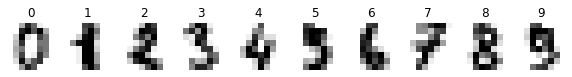

In [3]:
digits = datasets.load_digits()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('%i' % label)

In [4]:
X = digits.data
y = digits.target

n_clusters=10

dbscan = cluster.DBSCAN(eps=0.5, min_samples=5)
label = dbscan.fit_predict(X)

predicted_clusters = np.unique(label)
true_clusters = list(range(0, n_clusters))

In [5]:
embedding = umap.UMAP().fit_transform(X)

In [6]:
df = pd.DataFrame(embedding, columns=['X1', 'X2'])
df['true_cluster'] = y
df['predicted_cluster'] = label
df.head()

,X1,X2,true_cluster,predicted_cluster
0,15.027927,12.453560,0,-1
1,-3.972722,10.560235,1,-1
2,7.297486,3.177023,2,-1
3,0.523591,4.934259,3,-1
4,3.736874,17.512342,4,-1


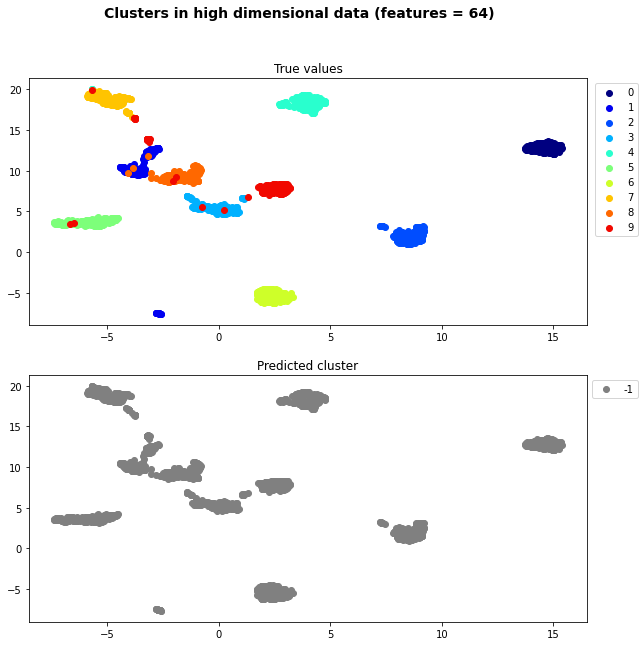

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(10, 10))

fig.suptitle('Clusters in high dimensional data (features = {})'.format(np.shape(X)[1]), fontsize=14, fontweight='bold')


ax1.set_title('True values')
for i in true_clusters:
    ax1.scatter(df[df.true_cluster == i].X1, df[df.true_cluster == i].X2, label=i, color=get_color(i, len(true_clusters)))
    


ax2.set_title('Predicted cluster')
for i in predicted_clusters:
    ax2.scatter(df[df.predicted_cluster == i].X1, df[df.predicted_cluster == i].X2, label=i, color=get_color(i, len(predicted_clusters)))

ax1.legend(bbox_to_anchor=(1.1, 1))
ax2.legend(bbox_to_anchor=(1.1, 1))

plt.show()

## Low dimensional data 

In [8]:
X, y = datasets.make_blobs(n_samples=750, centers=[[3,4],[-2,6],[3,12]], cluster_std=[1, 0.8, 1.5],
                            random_state=0)

In [9]:
n_clusters=3

dbscan = cluster.DBSCAN(eps=0.5, min_samples=5)
label = dbscan.fit_predict(X)

predicted_clusters = np.unique(label)
true_clusters = list(range(0, n_clusters))

In [10]:
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['true_cluster'] = y
df['predicted_cluster'] = label
df.head()

,X1,X2,true_cluster,predicted_cluster
0,2.600551,4.370056,0,0
1,-2.309497,5.591766,1,1
2,2.196590,3.310450,0,0
3,0.940436,10.398387,2,2
4,4.230291,5.202380,0,0


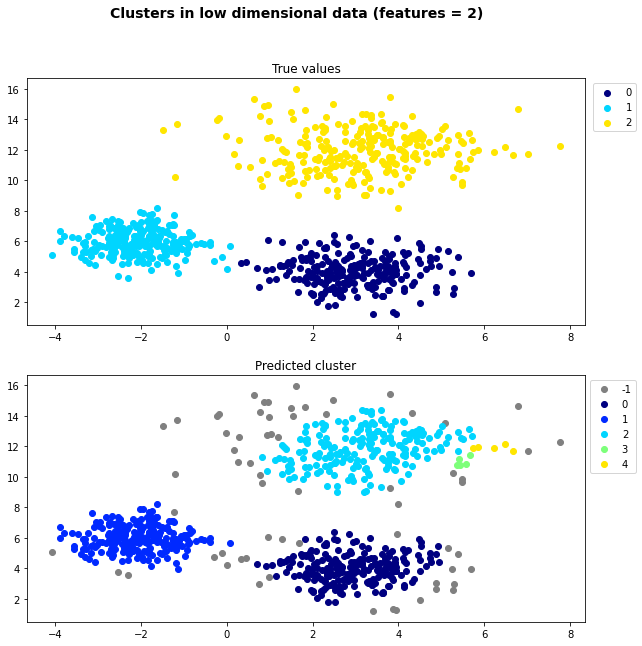

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(10, 10))

fig.suptitle('Clusters in low dimensional data (features = {})'.format(np.shape(X)[1]), fontsize=14, fontweight='bold')


ax1.set_title('True values')
for i in true_clusters:
    ax1.scatter(df[df.true_cluster == i].X1, df[df.true_cluster == i].X2, label=i, color=get_color(i, len(true_clusters)))
    


ax2.set_title('Predicted cluster')
for i in predicted_clusters:
    ax2.scatter(df[df.predicted_cluster == i].X1, df[df.predicted_cluster == i].X2, label=i, color=get_color(i, len(predicted_clusters)))

ax1.legend(bbox_to_anchor=(1.1, 1))
ax2.legend(bbox_to_anchor=(1.1, 1))

plt.show()